In [60]:
import numpy as np
import os.path
import imageio
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from scipy import integrate

In [2]:
import numpy as np
import os.path

def dimer_mode_coordinates(molecule, mode):
    dir_main = '/Users/nathanjansen/Documents/Lab/Data/pfas/normalmodes/'
    dir_xyz = dir_main + f'{molecule}_dimer/{mode}/{molecule}_dimer_{mode}.xyz'
    xyz = open(dir_xyz).readlines()
    geos = []
    count = 0
    for i in range(len(xyz)):
        line = xyz[i]
        if 'C' in line:
            count += 1
            if count%2 == 1:
                geo_xyz = []
                for j in range(10):
                    if molecule == 'cf4':
                        atom = xyz[i+j].split()
                    elif molecule == 'ch4':
                        atom = xyz[i+j-1].split()
                    elif molecule == 'mixed':
                        atom = xyz[i+j-1].split()
                    geo_xyz.append(atom)
                geos.append(geo_xyz)
                
    if molecule == 'ch4':
        Coordinates = {'H1': [], 'C1': [], 'H2': [], 'H3': [], 
                  'H4': [],'H5': [], 'C2': [], 'H6': [], 'H7': [], 'H8': [] }
        key = ['H1', 'C1', 'H2', 'H3', 'H4', 'H5', 'C2','H6','H7','H8']
    elif molecule == 'cf4':
        Coordinates = {'C1': [], 'C2': [], 'F5': [],'F1': [], 'F2': [], 
                  'F3': [], 'F4': [], 'F6': [], 'F7': [], 'F8': [] }
        key = ['C1','C2','F5','F1', 'F2', 'F3','F4','F6','F7','F8']
    elif molecule == 'mixed':
        Coordinates = {'H1': [], 'C1': [], 'H2': [], 'H3': [], 'H4': [], 
                  'C2': [], 'F1': [], 'F2': [], 'F3': [], 'F4': [] }
        key = ['H1','C1','H2','H3','H4', 'C2','F1', 'F2', 'F3','F4']                
    
    geo_sites = []
    
    for i in range(len(geos)):
        mol = geos[i]
        site_list = []
        for j in range(len(key)):
            site = mol[j]
            site_array = np.array([float(site[1]), float(site[2]), float(site[3])])
            site_list.append(site_array)
        geo_sites.append(site_list)

    for i in range(len(geos)):
        for j in range(len(key)):
            Coordinates[key[j]].append(geo_sites[i][j])     
    return Coordinates

In [3]:
def dimer_dma(mol, mode):
    DMA_S1 = [[],[],[],[]]
    DMA_S2 = [[],[],[],[]]
    DMA_S3 = [[],[],[],[]]
    DMA_S4 = [[],[],[],[]]
    DMA_S5 = [[],[],[],[]]
    DMA_S6 = [[],[],[],[]]
    DMA_S7 = [[],[],[],[]]
    DMA_S8 = [[],[],[],[]]
    DMA_S9 = [[],[],[],[]]
    DMA_S10 = [[],[],[],[]]
    DMA_total = [DMA_S1, DMA_S2, DMA_S3, DMA_S4, DMA_S5,
                 DMA_S6, DMA_S7, DMA_S8, DMA_S9, DMA_S10]

    dip_mol = []
    quad_mol = []
    
    DMX = []; DMY = []; DMZ = []
    
    QMXX = []; QMYY = []; QMZZ = []; QMXY = []; QMXZ = []; QMYZ = [];
    
    site_names = []
    for geo in range(15):
        CC = False;
        directory = f'/Users/nathanjansen/Documents/Lab/Data/pfas/normalmodes/{mol}_dimer/{mode}/{mol}_dimer_{mode}_geo{geo+1}.out'
        if os.path.isfile(directory):
            out_file = open(directory).readlines()
            for i in range(len(out_file)):
                if 'PROGRAM * CCSD (Closed-shell coupled cluster)' in out_file[i]:
                    CC = True
                        
                if 'DMX             DMY             DMZ  ' in out_file[i] and CC is True:
                    x = out_file[i+6].split()
                    DMX.append(float(x[2]))
                    DMY.append(float(x[3]))
                    DMZ.append(float(x[4]))
                        
                if 'QMXX            QMYY            QMZZ' in out_file[i] and CC is True:
                    x = out_file[i+9].split()
                    QMXX.append(float(x[2]))
                    QMYY.append(float(x[3]))
                    QMZZ.append(float(x[4]))
                    QMXY.append(float(x[5]))
                    QMXZ.append(float(x[6]))
                    QMYZ.append(float(x[7]))
                cnt = 0        
                if 'PROGRAM * DMA (Distributed multipole analysis)     Author: A.J. Stone' in out_file[i] and CC is True:
                    for site in range(10):
                        cnt += 1
                        for j in range(i+6, i+17*cnt):
                            site_line = False
                            if f'Distributed multipoles for site   {site+1} ( F)' in out_file[j]:
                                sn = f'F{site+1}'
                                site_names.append(sn)
                                site_line = True
                            if f'Distributed multipoles for site   {site+1} ( H)' in out_file[j]:
                                sn = f'H{site+1}'
                                site_names.append(sn)
                                site_line = True
                            if 'Distributed multipoles for site  10 ( H)' in out_file[j]:
                                sn = f'H10'
                                site_names.append(sn)
                                site_line = True
                            if 'Distributed multipoles for site  10 ( F)' in out_file[j]:
                                sn = f'F{site+1}'
                                site_names.append(sn)
                                site_line = True
                            if f'Distributed multipoles for site   {site+1} ( C)' in out_file[j]:
                                sn = f'C{site+1}'
                                site_names.append(sn)
                                site_line = True
                            if site_line is True:    
                                site_list = DMA_total[site]
                                x = out_file[j+4].split()
                                Q00 = float(x[1])
                                site_list[0].append(Q00)
                                Q10 = float(x[2])
                                site_list[1].append(Q10)
                                x = out_file[j+5].split()
                                Q11c = float(x[1])
                                site_list[2].append(Q11c)
                                x = out_file[j+6].split()
                                Q11s = float(x[1])
                                site_list[3].append(Q11s)
                                site_line = False


        else:
            print(directory)

    dip_mol.append(np.array(DMX))
    dip_mol.append(np.array(DMY))
    dip_mol.append(np.array(DMZ))
    
    quad_mol.append(np.array(QMXX))
    quad_mol.append(np.array(QMYY))
    quad_mol.append(np.array(QMZZ))
    quad_mol.append(np.array(QMXY))
    quad_mol.append(np.array(QMXZ))
    quad_mol.append(np.array(QMYZ))

    DMA_SN = {}
    key2 = ['Q00','Q10','Q11c','Q11s']
    for i in range(10):
        k1 = site_names[i]
        DMA_SN[k1] = {}
        for q, k2 in enumerate(DMA_total[i]):
            key = key2[q]
            DMA_SN[k1][key] = np.array(k2) 

    return DMA_SN, dip_mol, quad_mol, site_names

In [4]:
def dimer_energy(mol, mode):

    energy = [[],[]]

    for geo in range(15):
        CC = False;
        directory = f'/Users/nathanjansen/Documents/Lab/Data/pfas/normalmodes/{mol}_dimer/{mode}/{mol}_dimer_{mode}_geo{geo+1}.out'
        if os.path.isfile(directory):
            out_file = open(directory).readlines()
            e = out_file[::-1][2].split()
            energy[0].append(float(e[0]))
            energy[1].append(float(e[1]))   
        else:
            print(directory)

    Energy = {'CC' : np.array(energy[0]), 'HF': np.array(energy[1])}

    return Energy

In [5]:
ch4_3194_dma, ch4_3194_dip, ch4_3194_quad, ch4_3194_names = dimer_dma('ch4', '3194') 
ch4_3198_dma, ch4_3198_dip, ch4_3198_quad, ch4_3198_names = dimer_dma('ch4', '3198')  
ch4_3202_dma, ch4_3202_dip, ch4_3202_quad, ch4_3202_names = dimer_dma('ch4', '3202') 

ch4_3194_sites = dimer_mode_coordinates('ch4', '3194')
ch4_3198_sites = dimer_mode_coordinates('ch4', '3198')
ch4_3202_sites = dimer_mode_coordinates('ch4', '3202')

ch4_3194_energy = dimer_energy('ch4', '3194')
ch4_3198_energy = dimer_energy('ch4', '3198')
ch4_3202_energy = dimer_energy('ch4', '3202')
ch4_3202_energy

{'CC': array([-80.86502511, -80.86557035, -80.8671111 , -80.86937483,
        -80.87195091, -80.87435026, -80.87607973, -80.87672732,
        -80.87604827, -80.87403961, -80.87098219, -80.86742523,
        -80.86409347, -80.8617226 , -80.86086438]),
 'HF': array([-80.41408353, -80.41464809, -80.41624382, -80.41858983,
        -80.42126321, -80.42376097, -80.42557673, -80.42628837,
        -80.42564555, -80.42364517, -80.42057321, -80.41698791,
        -80.41362494, -80.41123034, -80.41036333])}

In [31]:
mixed_1286_dma, mixed_1286_dip, mixed_1286_quad, mixed_1286_names = dimer_dma('mixed', '1286') 
mixed_1286b_dma, mixed_1286b_dip, mixed_1286b_quad, mixed_1286b_names = dimer_dma('mixed', '1286b')  
mixed_1289_dma, mixed_1289_dip, mixed_1289_quad, mixed_1289_names = dimer_dma('mixed', '1289') 

mixed_1286_sites = dimer_mode_coordinates('mixed', '1286')
mixed_1286b_sites = dimer_mode_coordinates('mixed', '1286b')
mixed_1289_sites = dimer_mode_coordinates('mixed', '1289')

mixed_1286_energy = dimer_energy('mixed', '1286')
mixed_1286b_energy = dimer_energy('mixed', '1286b')
mixed_1289_energy = dimer_energy('mixed', '1289')

In [48]:
cf4_1273_dma, cf4_1273_dip, cf4_1273_quad, cf4_1273_names = dimer_dma('cf4', '1273') 
cf4_1302_dma, cf4_1302_dip, cf4_1302_quad, cf4_1302_names = dimer_dma('cf4', '1302')  
cf4_1303_dma, cf4_1303_dip, cf4_1303_quad, cf4_1303_names = dimer_dma('cf4', '1303') 

cf4_1273_sites = dimer_mode_coordinates('cf4', '1273')
cf4_1302_sites = dimer_mode_coordinates('cf4', '1302')
cf4_1303_sites = dimer_mode_coordinates('cf4', '1303')

cf4_1273_energy = dimer_energy('cf4', '1273')
cf4_1302_energy = dimer_energy('cf4', '1302')
cf4_1303_energy = dimer_energy('cf4', '1303')

In [16]:
# calculating the change in CC

C1_eq = ch4_3194_sites['C1'][7]


dC1 = np.zeros(15)

for i in range(15):
    c1_pos = ch4_3194_sites['C1'][i]
    c1_vec = c1_pos - C1_eq
    c1_vec_mag = np.sqrt(c1_vec[0]**2 + c1_vec[1]**2 + c1_vec[2]**2)
    dC1[i] = c1_vec_mag
 

In [17]:
ch4_3194_sites

{'H1': [array([ 0.1139  , -0.059474, -3.140363]),
  array([ 0.113626, -0.059702, -3.139421]),
  array([ 0.112816, -0.060372, -3.136644]),
  array([ 0.111512, -0.061453, -3.13217 ]),
  array([ 0.109778, -0.062889, -3.126223]),
  array([ 0.107702, -0.064609, -3.119103]),
  array([ 0.105389, -0.066527, -3.111165]),
  array([ 0.102952, -0.068545, -3.102808]),
  array([ 0.100516, -0.070564, -3.094452]),
  array([ 0.098202, -0.072481, -3.086514]),
  array([ 0.096127, -0.074201, -3.079394]),
  array([ 0.094393, -0.075637, -3.073447]),
  array([ 0.093089, -0.076718, -3.068973]),
  array([ 0.092279, -0.077389, -3.066196]),
  array([ 0.092005, -0.077616, -3.065254])],
 'C1': [array([ 0.070744,  0.017897, -2.010966]),
  array([ 0.070376,  0.017423, -2.011167]),
  array([ 0.069293,  0.016025, -2.011763]),
  array([ 0.067548,  0.013773, -2.012723]),
  array([ 0.065229,  0.010781, -2.013998]),
  array([ 0.062451,  0.007197, -2.015525]),
  array([ 0.059355,  0.003203, -2.017227]),
  array([ 5.60960e-

In [18]:
x_scaled = dC1/dC1[0]

for i in range(7):
    x_scaled[i]*=-1
x_scaled   

array([-1.        , -0.97491848, -0.90095815, -0.7818087 , -0.62349909,
       -0.43386594, -0.22253059,  0.        ,  0.22251794,  0.43385329,
        0.62346343,  0.78179605,  0.9009455 ,  0.97490583,  0.99997699])

In [19]:
kcal = 627.5

ch4_energy = -40.414459
ch4_enthalpy = -40.365282
ch4_gibbs = -40.386398

ch4_d_energy = -80.829708 
ch4_d_enthalpy = -80.731117
ch4_d_gibbs = -80.765148

cf4_energy = -436.999601
cf4_enthalpy = -436.977550
cf4_gibbs = -437.007219

cf4_d_energy = -874.001419
cf4_d_enthalpy = -873.957852
cf4_d_gibbs = -874.000439

mixed_energy = -477.415690
mixed_enthalpy = -477.344182
mixed_gibbs = -477.383246


cf4_interaction_energy = (cf4_d_energy - 2*(cf4_energy))*kcal
cf4_interaction_enthalpy = (cf4_d_enthalpy - 2*(cf4_enthalpy))*kcal
cf4_interaction_gibbs = (cf4_d_gibbs - 2*(cf4_gibbs))*kcal

ch4_interaction_energy = (ch4_d_energy - 2*(ch4_energy))*kcal
ch4_interaction_enthalpy = (ch4_d_enthalpy - 2*(ch4_enthalpy))*kcal
ch4_interaction_gibbs = (ch4_d_gibbs - 2*(ch4_gibbs))*kcal

mixed_interaction_energy = (mixed_energy - (cf4_energy+ch4_energy))*kcal
mixed_interaction_enthalpy = (mixed_enthalpy - (cf4_enthalpy+ch4_enthalpy))*kcal
mixed_interaction_gibbs = (mixed_gibbs - (cf4_gibbs+ch4_gibbs))*kcal


print('                  dE                     dH                  dG')

print(f'CF4..CF4 = {cf4_interaction_energy},   {cf4_interaction_enthalpy},  {cf4_interaction_gibbs}')
print(f'CF4..CH4 = {mixed_interaction_energy},  {mixed_interaction_enthalpy},  {mixed_interaction_gibbs}')
print(f'CH4..CH4 = {ch4_interaction_energy},  {ch4_interaction_enthalpy},   {ch4_interaction_gibbs}')

                  dE                     dH                  dG
CF4..CF4 = -1.3911675000545642,   -1.726879999991695,  8.784372500007862
CF4..CH4 = -1.0228249999858008,  -0.8471250000013697,  6.5078025000129
CH4..CH4 = -0.4957249999968383,  -0.3470074999977868,   4.799120000002013


In [ ]:
kcal = 627.5

c2h6_energy = -40.414459
c2h6_enthalpy = -40.365282
c2h6_gibbs = -40.386398

c2h6_d_energy = -80.829708 
c2h6_d_enthalpy = -80.731117
c2h6_d_gibbs = -80.765148

c2f6_energy = -675.370089
c2f6_enthalpy = -675.333394
c2f6_gibbs = -675.370992

c2f6_d_energy = -1350.742674
c2f6_d_enthalpy = -1350.669821
c2f6_d_gibbs = - 1350.722769

mixed_c2_energy = -477.415690
mixed_c2_enthalpy = -477.344182
mixed_c2_gibbs = -477.383246


c2f6_interaction_energy = (c2f6_d_energy - 2*(c2f6_energy))*kcal
c2f6_interaction_enthalpy = (c2f6_d_enthalpy - 2*(c2f6_enthalpy))*kcal
c2f6_interaction_gibbs = (c2f6_d_gibbs - 2*(c2f6_gibbs))*kcal

c2h6_interaction_energy = (c2h6_d_energy - 2*(c2h6_energy))*kcal
c2h6_interaction_enthalpy = (c2h6_d_enthalpy - 2*(c2h6_enthalpy))*kcal
c2h6_interaction_gibbs = (c2h6_d_gibbs - 2*(c2h6_gibbs))*kcal

mixed_c2_interaction_energy = (mixed_c2_energy - (c2f6_energy+c2h6_energy))*kcal
mixed_c2_interaction_enthalpy = (mixed_c2_enthalpy - (c2f6_enthalpy+c2h6_enthalpy))*kcal
mixed_c2_interaction_gibbs = (mixed_c2_gibbs - (c2f6_gibbs+c2h6_gibbs))*kcal


print('                  dE                     dH                  dG')

print(f'c2f6..c2f6 = {c2f6_interaction_energy},   {c2f6_interaction_enthalpy},  {c2f6_interaction_gibbs}')
print(f'c2f6..c2h6 = {mixed_c2_interaction_energy},  {mixed_c2_interaction_enthalpy},  {mixed_c2_interaction_gibbs}')
print(f'c2h6..c2h6 = {c2h6_interaction_energy},  {c2h6_interaction_enthalpy},   {c2h6_interaction_gibbs}')

In [20]:
kcal = 0.00285911
m1 = 1272
m2 = 1273
m5 = 1316
m6 = 1303
print('CF4')
print(f'1272 = {m1*kcal}')
print(f'1273 = {m2*kcal}')
print(f'1316 = {m5*kcal}')
print(f'1303 = {m6*kcal}')

CF4
1272 = 3.63678792
1273 = 3.6396470300000003
1316 = 3.7625887600000003
1303 = 3.7254203300000004


In [21]:
kcal = 0.00285911
m1 = 1255
m2 = 1243
m5 = 1264
m6 = 1269
print('C2F6')
print(f'1272 = {m1*kcal}')
print(f'1243 = {m2*kcal}')
print(f'1264 = {m5*kcal}')
print(f'1269 = {m6*kcal}')

C2F6
1272 = 3.5881830500000005
1243 = 3.5538737300000003
1264 = 3.61391504
1269 = 3.62821059


In [22]:
kcal = 0.00285911
m1 = 3194
m2 = 3198
m5 = 3200
m6 = 3202

print('CH4')
print(f'3194 = {m1*kcal}')
print(f'3198 = {m2*kcal}')
print(f'3200 = {m5*kcal}')
print(f'3202 = {m6*kcal}')

CH4
3194 = 9.13199734
3198 = 9.14343378
3200 = 9.149152
3202 = 9.154870220000001


In [23]:
kcal = 0.00285911
m1 = 1286
m2 = 1289


print('mixed')
print(f'1286 = {m1*kcal}')
print(f'1289 = {m2*kcal}')


mixed
1286 = 3.6768154600000003
1289 = 3.6853927900000003


In [24]:
def sapt_normal_modes(mol, mode):
    dir_main = f'/Users/nathanjansen/Documents/Lab/Data/pfas/normalmodes/{mol}_dimer/{mode}/'
    
    
    sapt = {'elec' : np.zeros(15),'exch' : np.zeros(15), 
            'indc' : np.zeros(15), 'disp' : np.zeros(15), 
            'etot' : np.zeros(15)}
        
    for j in range(15):
        directory = dir_main + f'sapt_{mol}_dimer_{mode}_geo{j+1}.out'

        if os.path.isfile(directory):
            out_file = open(directory).readlines()
            for i in range(len(out_file)):
                if 'Electrostatics  ' in out_file[i]:
                    val = out_file[i].split()[3]
                    sapt['elec'][j] = val

                if 'Exchange  ' in out_file[i]:
                    val = out_file[i].split()[3] 
                    sapt['exch'][j] = float(val)

                if 'Induction  ' in out_file[i]:
                    val = out_file[i].split()[3]
                    sapt['indc'][j] = val

                if 'Dispersion  ' in out_file[i]:
                    val = out_file[i].split()[3]
                    sapt['disp'][j] = val

                if 'Total SAPT2+3(CCD)' in out_file[i]:
                    val = out_file[i].split()[4]
                    sapt['etot'][j] = val   
        else:
            print(directory)
                
    
    return sapt

In [27]:
# calculating the change in CC

dF1 = np.zeros(15)
dF2 = np.zeros(15)
dF3 = np.zeros(15)
dF4 = np.zeros(15)


bond1_eq = cf4_1339_sites['F1'][7]-cf4_1339_sites['C1'][7]
bond1_eq_mag = np.sqrt(bond1_eq[0]**2 + bond1_eq[1]**2 + bond1_eq[2]**2)

bond2_eq = cf4_1339_sites['F2'][7]-cf4_1339_sites['C1'][7]
bond2_eq_mag = np.sqrt(bond2_eq[0]**2 + bond2_eq[1]**2 + bond2_eq[2]**2)

bond3_eq = cf4_1339_sites['F3'][7]-cf4_1339_sites['C1'][7]
bond3_eq_mag = np.sqrt(bond3_eq[0]**2 + bond3_eq[1]**2 + bond3_eq[2]**2)

bond4_eq = cf4_1339_sites['F4'][7]-cf4_1339_sites['C1'][7]
bond4_eq_mag = np.sqrt(bond4_eq[0]**2 + bond4_eq[1]**2 + bond4_eq[2]**2)

for i in range(15):
 
    C1_pos = cf4_1339_sites['C1'][i]
    
    bond1 = cf4_1339_sites['F1'][i]-C1_pos
    bond1_mag = np.sqrt(bond1[0]**2 + bond1[1]**2 + bond1[2]**2)
    dF1[i] = bond1_mag-bond1_eq_mag
    
    bond2 = cf4_1339_sites['F2'][i]- C1_pos
    bond2_mag = np.sqrt(bond2[0]**2 + bond2[1]**2 + bond2[2]**2)
    dF2[i] = bond2_mag-bond2_eq_mag
    
    bond3 = cf4_1339_sites['F3'][i] - C1_pos
    bond3_mag = np.sqrt(bond3[0]**2 + bond3[1]**2 + bond3[2]**2)
    dF3[i] = bond3_mag-bond3_eq_mag  
    
    bond4 = cf4_1339_sites['F4'][i] - C1_pos
    bond4_mag = np.sqrt(bond4[0]**2 + bond4[1]**2 + bond4[2]**2)
    dF4[i] = bond4_mag-bond4_eq_mag   
    
#print(dF2)
#print(dF3)
#print(dF4)

xscaled = dF2/dF2[0]

print(xscaled)


[ 1.          0.97485595  0.90061074  0.78117973  0.62255233  0.43293002
  0.22186521  0.         -0.22142621 -0.43136383 -0.61937824 -0.77615556
 -0.89398476 -0.96705561 -0.99182848]


In [99]:
def trapezoid(data, R):
    etot = 0
    for i in range(len(R)-1):
        h = np.abs(R[i]-R[i+1])
        etot += h*(data[i]+data[i+1])/2
    return etot


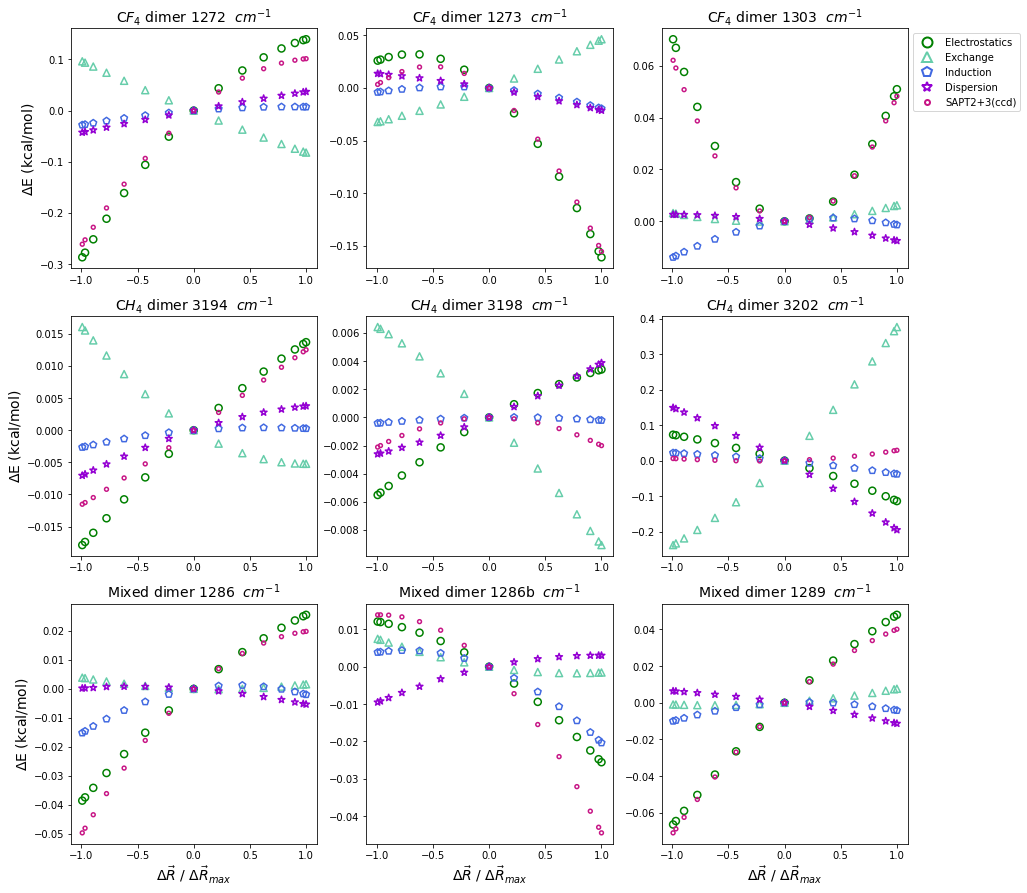

In [100]:
clr = ['g', 'mediumaquamarine','royalblue', 'darkviolet','mediumvioletred'] # colors for graph
#

lbl = ['Electrostatics','Exchange', 'Induction', 'Dispersion', 'SAPT2+3(ccd)']
mkr =['o','^','p','*','.']

r1 = mlines.Line2D([], [], color=clr[0], marker= mkr[0], markeredgewidth = 2,linestyle='None',
                          markersize=10, markerfacecolor='none', markeredgecolor=clr[0],linewidth=1.5,label=lbl[0])
    
r2 = mlines.Line2D([], [], color=clr[1], marker=mkr[1], markeredgewidth = 2,linestyle='None',
                          markersize=10, markerfacecolor='none', markeredgecolor=clr[1],linewidth=1.5,label=lbl[1])

r3 = mlines.Line2D([], [], color=clr[2], marker=mkr[2], markeredgewidth = 2,linestyle='None',
                          markersize=10, markerfacecolor='none', markeredgecolor=clr[2],linewidth=1.5,label=lbl[2])

r4 = mlines.Line2D([], [], color=clr[3], marker=mkr[3], markeredgewidth = 2,linestyle='None',
                          markersize=10,markerfacecolor='none', markeredgecolor=clr[3],linewidth=1.5, label=lbl[3])


r5 = mlines.Line2D([], [], color=clr[4], marker=mkr[4], markeredgewidth = 2,linestyle='None',
                          markersize=10,markerfacecolor='none', markeredgecolor=clr[4],linewidth=1.5, label=lbl[4])



en_int = {'cf4':{'1272':[],'1273':[],'1303':[]},
      'ch4':{'3194':[],'3198':[],'3202':[]},
      'mixed':{'1286':[],'1286b':[],'1289':[]}}


mol = ['cf4','ch4', 'mixed']

freq = [['1272', '1273', '1303'],['3194','3198','3202'],['1286', '1286b','1289']]


fig, axs = plt.subplots(3,3, figsize=(15,15))

R = xscaled
mtit = [r'C$F_{4}$',r'C$H_{4}$', r'Mixed']
for i, m in enumerate(mol):
    for j, f in enumerate(freq[i]):
        data = sapt_normal_modes(m, f) 
        energy = dimer_energy(m, f)
                
        fig_title = f'{mtit[i]} dimer {f} '+r' $cm^{-1}$'
        axs[i][j].scatter(R, data['elec']-data['elec'][7], s=50, 
                        marker = mkr[0], facecolors='none', edgecolors=clr[0],linewidth=1.5)
        I = trapezoid(data['elec']-data['elec'][7], R)
        en_int[m][f].append(I)
        
        axs[i][j].scatter(R, data['exch']-data['exch'][7], s=50, 
                        marker = mkr[1], facecolors='none', edgecolors=clr[1],linewidth=1.5)
        I = trapezoid(data['exch']-data['exch'][7], R)
        en_int[m][f].append(I)
        
        
        axs[i][j].scatter(R, data['indc']-data['indc'][7], s=50, 
                        marker = mkr[2], facecolors='none', edgecolors=clr[2],linewidth=1.5)
        I = trapezoid(data['indc']-data['indc'][7], R)
        en_int[m][f].append(I)
        
        axs[i][j].scatter(R, data['disp']-data['disp'][7], s=50, 
                        marker = mkr[3], facecolors='none', edgecolors=clr[3],linewidth=1.5)
        I = trapezoid(data['disp']-data['disp'][7], R)
        en_int[m][f].append(I)
        
        axs[i][j].scatter(R, data['etot']-data['etot'][7], s=60, 
                        marker = mkr[4], facecolors='none', edgecolors=clr[4],linewidth=1.5)
        I = trapezoid(data['etot']-data['etot'][7], R)
        en_int[m][f].append(I)

        axs[i][j].set_title(fig_title, fontsize=14)
        
axs[2,1].set_xlabel(r'$\Delta \vec R$ / $\Delta \vec R_{max}$', fontsize=14)    
axs[2,0].set_xlabel(r'$\Delta \vec R$ / $\Delta \vec R_{max}$', fontsize=14)    
axs[2,2].set_xlabel(r'$\Delta \vec R$ / $\Delta \vec R_{max}$', fontsize=14)    


axs[0,0].set_ylabel(r'$\Delta$E (kcal/mol)', fontsize=14)    
axs[1,0].set_ylabel(r'$\Delta$E (kcal/mol)', fontsize=14) 
axs[2,0].set_ylabel(r'$\Delta$E (kcal/mol)', fontsize=14) 

fig.patch.set_facecolor('white')
handles=[r1,r2,r3,r4,r5]
lgd = axs[0,2].legend(bbox_to_anchor=(1, 1), handles=handles, loc='upper left')
figuredir = '/Users/nathanjansen/Documents/Lab/Data/pfas/normalmodes/dimerfigs/'

plt.savefig(figuredir +f'asym_stretch_sapt.tiff', format='tiff', bbox_inches='tight')# ,dpi=300)

In [105]:
cfdf = pd.DataFrame(en_int['cf4'], index=lbl)

chdf = pd.DataFrame(en_int['ch4'], index=lbl)
mdf = pd.DataFrame(en_int['mixed'], index=lbl)

pd.concat([cfdf,chdf,mdf], axis = 1, keys = ['CF4','CH4','Mixed'])

CF4                           CH4                      \
                    1272      1273      1303      3194      3198      3202   
Electrostatics -0.048465 -0.045900  0.040768 -0.001328 -0.000692 -0.014317   
Exchange        0.004296  0.004924  0.003156  0.003615 -0.000935  0.048224   
Induction      -0.006945 -0.007974 -0.005099 -0.000798 -0.000209 -0.005584   
Dispersion     -0.001717 -0.002653 -0.001685 -0.001087  0.000443 -0.016513   
SAPT2+3(ccd)   -0.052830 -0.051603  0.037139  0.000402 -0.001393  0.011811   

                   Mixed                     
                    1286    1286b      1289  
Electrostatics -0.004213 -0.00464 -0.005896  
Exchange        0.001821  0.00196  0.002274  
Induction      -0.005733 -0.00562 -0.004742  
Dispersion     -0.001713 -0.00219 -0.001714  
SAPT2+3(ccd)   -0.009838 -0.01049 -0.010078

In [254]:
# calculating the change in CC

C1_eq = ch4_3194_sites['C1'][7]


dC1 = np.zeros(15)
dC2 = np.zeros(15)
dH1 = np.zeros(15)
dmx = np.zeros(15)
dcf4 = np.zeros(15)
for i in range(15):
    c1_pos = ch4_3194_sites['C1'][i]
    c1_vec = c1_pos - C1_eq
    c1_vec_mag = np.sqrt(c1_vec[0]**2 + c1_vec[1]**2 + c1_vec[2]**2)
    dC1[i] = c1_vec_mag
    
    c2_pos = ch4_3194_sites['C2'][i]
    c2_vec = c2_pos - C2_eq
    c2_vec_mag = np.sqrt(c2_vec[0]**2 + c2_vec[1]**2 + c2_vec[2]**2)
    dC2[i] = c2_vec_mag
    
    h1_pos = ch4_3194_sites['H1'][i]
    h1_vec = h1_pos - H1_eq
    h1_vec_mag = np.sqrt(h1_vec[0]**2 + h1_vec[1]**2 + h1_vec[2]**2)
    dH1[i] = h1_vec_mag    
    
    mx_pos = mixed_1289_sites['F1'][i]
    mx_vec = mx_pos - mx_eq
    mx_vec_mag = np.sqrt(mx_vec[0]**2 + mx_vec[1]**2 + mx_vec[2]**2)
    dmx[i] = mx_vec_mag   
    
    cf4_pos = cf4_1339_sites['F1'][i]
    cf4_vec = cf4_pos - cf4_eq
    cf4_vec_mag = np.sqrt(cf4_vec[0]**2 + cf4_vec[1]**2 + cf4_vec[2]**2)
    dcf4[i] = cf4_vec_mag     



x_scaled = dcf4/dcf4[0]
x_scaledb = dcf4/dcf4[14]
print(x_scaledb)
#for i in range(7):
   # x_scaled[i]*=-1
    
x_scaled    

[0.99989646 0.97493827 0.90087184 0.78169056 0.62347522 0.43389222
 0.22246347 0.         0.22256698 0.43399572 0.62343467 0.78179408
 0.90097538 0.97489773 1.        ]


array([1.        , 0.97503923, 0.90096513, 0.78177151, 0.62353978,
       0.43393716, 0.22248651, 0.        , 0.22259003, 0.43404066,
       0.62349923, 0.78187504, 0.90106868, 0.97499869, 1.00010356])

In [379]:
# calculating the change in CC

dH1 = np.zeros(15)
dH2 = np.zeros(15)
dH3 = np.zeros(15)
dH4 = np.zeros(15)


bond1_eq = ch4_3194_sites['H1'][7]-ch4_3194_sites['C1'][7]
bond1_eq_mag = np.sqrt(bond1_eq[0]**2 + bond1_eq[1]**2 + bond1_eq[2]**2)

bond2_eq = ch4_3194_sites['H2'][7]-ch4_3194_sites['C1'][7]
bond2_eq_mag = np.sqrt(bond2_eq[0]**2 + bond2_eq[1]**2 + bond2_eq[2]**2)

bond3_eq = ch4_3194_sites['H3'][7]-ch4_3194_sites['C1'][7]
bond3_eq_mag = np.sqrt(bond3_eq[0]**2 + bond3_eq[1]**2 + bond3_eq[2]**2)

bond4_eq = ch4_3194_sites['H4'][7]-ch4_3194_sites['C1'][7]
bond4_eq_mag = np.sqrt(bond4_eq[0]**2 + bond4_eq[1]**2 + bond4_eq[2]**2)
b4m = []
for i in range(15):
 
    C1_pos = ch4_3194_sites['C1'][i]
    
    bond1 = ch4_3194_sites['H1'][i]-C1_pos
    bond1_mag = np.sqrt(bond1[0]**2 + bond1[1]**2 + bond1[2]**2)
    dH1[i] = bond1_mag - bond1_eq_mag
    
    bond2 = ch4_3194_sites['H2'][i]- C1_pos
    bond2_mag = np.sqrt(bond2[0]**2 + bond2[1]**2 + bond2[2]**2)
    dH2[i] = bond2_mag - bond2_eq_mag
    
    bond3 = ch4_3194_sites['H3'][i] - C1_pos
    bond3_mag = np.sqrt(bond3[0]**2 + bond3[1]**2 + bond3[2]**2)
    dH3[i] = bond3_mag - bond3_eq_mag
    
    bond4 = ch4_3194_sites['H4'][i] - C1_pos
    bond4_mag = np.sqrt(bond4[0]**2 + bond4[1]**2 + bond4[2]**2)
    dH4[i] = bond4_mag  - bond4_eq_mag

    
print(dH1)
print(dH2)
print(dH3)
print(dH4)

[ 0.04596538  0.04481268  0.041411    0.03593172  0.02865101  0.01993598
  0.01022329  0.         -0.0102175  -0.01991997 -0.02862004 -0.03588412
 -0.04134843 -0.04473969 -0.04588978]
[-0.12507387 -0.12193803 -0.11268746 -0.09778692 -0.07798299 -0.05426699
 -0.02783218  0.          0.02783192  0.05426684  0.0779823   0.09778581
  0.11268782  0.1219383   0.12507419]
[ 0.03242919  0.03161509  0.02921356  0.02534771  0.02020975  0.01406107
  0.0072091   0.         -0.0072068  -0.01404654 -0.02018054 -0.0252992
 -0.02914994 -0.03154045 -0.03235063]
[ 0.05265438  0.05133208  0.04743597  0.04116054  0.03282113  0.02283691
  0.01171027  0.         -0.0117067  -0.02282351 -0.03279257 -0.04111812
 -0.04737842 -0.0512646  -0.05258242]


In [368]:
cf4_1339_sites['F1']

[array([ 1.901308,  0.108624, -0.116105]),
 array([ 1.901279,  0.108704, -0.116002]),
 array([ 1.901193,  0.108941, -0.115696]),
 array([ 1.901055,  0.109323, -0.115204]),
 array([ 1.900871,  0.10983 , -0.114551]),
 array([ 1.900651,  0.110437, -0.113768]),
 array([ 1.900405,  0.111114, -0.112895]),
 array([ 1.900146,  0.111827, -0.111977]),
 array([ 1.899888,  0.11254 , -0.111058]),
 array([ 1.899642,  0.113217, -0.110185]),
 array([ 1.899422,  0.113824, -0.109403]),
 array([ 1.899238,  0.114331, -0.108749]),
 array([ 1.8991  ,  0.114713, -0.108257]),
 array([ 1.899014,  0.11495 , -0.107952]),
 array([ 1.898985,  0.11503 , -0.107848])]

In [295]:
cf4_1339_sites

{'C1': [array([ 1.528897, -0.021821,  1.161912]),
  array([ 1.528919, -0.02245 ,  1.161635]),
  array([ 1.528983, -0.024306,  1.16082 ]),
  array([ 1.529087, -0.027295,  1.159508]),
  array([ 1.529225, -0.031269,  1.157763]),
  array([ 1.52939 , -0.036026,  1.155673]),
  array([ 1.529574, -0.04133 ,  1.153344]),
  array([ 1.529767, -0.046914,  1.150892]),
  array([ 1.529961, -0.052498,  1.14844 ]),
  array([ 1.530145, -0.057801,  1.146111]),
  array([ 1.53031 , -0.062559,  1.144021]),
  array([ 1.530447, -0.066532,  1.142276]),
  array([ 1.530551, -0.069522,  1.140964]),
  array([ 1.530616, -0.071378,  1.140149]),
  array([ 1.530637, -0.072007,  1.139872])],
 'C2': [array([-1.538451,  0.067855, -1.137677]),
  array([-1.538228,  0.067337, -1.138019]),
  array([-1.537571,  0.065809, -1.13903 ]),
  array([-1.536512,  0.063347, -1.140658]),
  array([-1.535104,  0.060075, -1.142821]),
  array([-1.533419,  0.056158, -1.145412]),
  array([-1.53154,  0.05179, -1.1483 ]),
  array([-1.529563,  0

In [256]:
dcf4

array([0.00535255, 0.00521895, 0.00482246, 0.00418447, 0.00333753,
       0.00232267, 0.00119087, 0.        , 0.00119143, 0.00232323,
       0.00333731, 0.00418503, 0.00482302, 0.00521873, 0.00535311])

In [250]:
dH1

array([0.04015619, 0.03914901, 0.03617971, 0.03139581, 0.02503691,
       0.01742359, 0.00893592, 0.        , 0.00893494, 0.01742266,
       0.0250357 , 0.03139461, 0.0361785 , 0.03914802, 0.04015498])

In [251]:
dC2

array([0.02523174, 0.02459889, 0.02273274, 0.0197264 , 0.01573197,
       0.01094719, 0.00561483, 0.        , 0.00561452, 0.01094687,
       0.01573107, 0.01972608, 0.02273242, 0.02459857, 0.02523116])

In [252]:
dcf4

array([1.33359694, 1.33338941, 1.33278144, 1.33180848, 1.33052566,
       1.32900604, 1.32733489, 1.32560078, 1.32389224, 1.32229339,
       1.32087854, 1.31971204, 1.31884384, 1.31830801, 1.31812661])

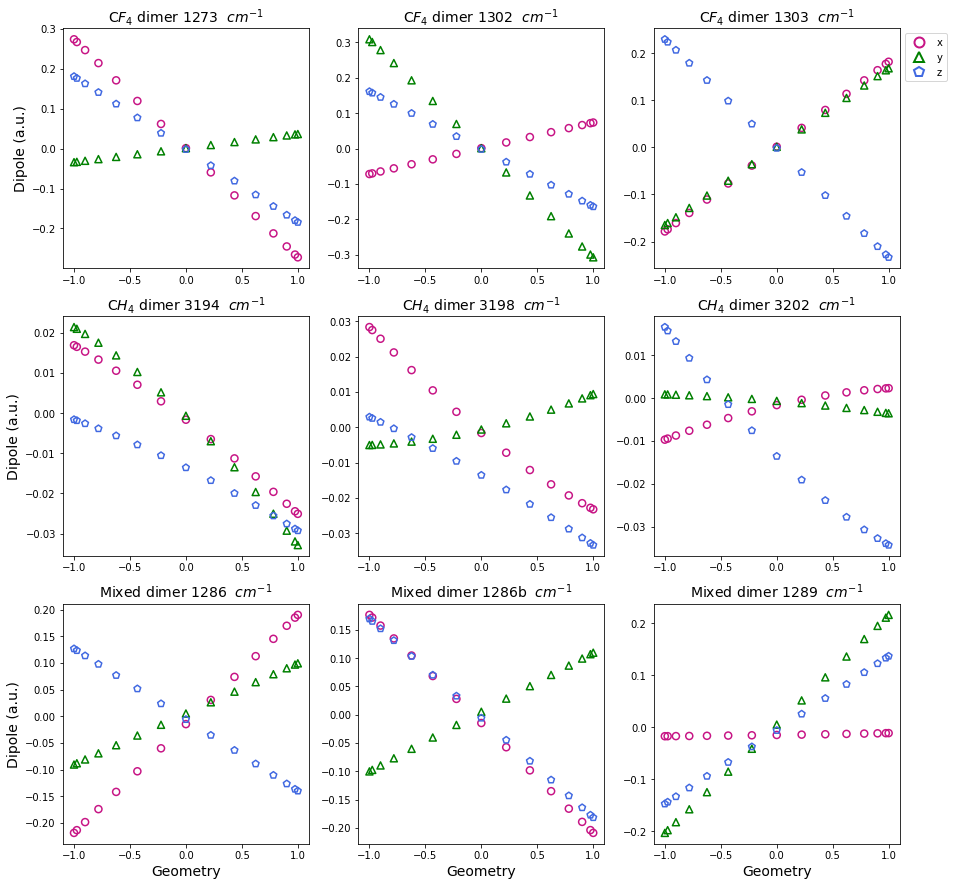

In [49]:


#clr = ['g', 'mediumaquamarine','royalblue', 'darkviolet','mediumvioletred'] # colors for graph
clr = [ 'mediumvioletred', 'g', 'royalblue'] 

lbl = ['x','y', 'z']
mkr =['o','^','p','*','.']

r1 = mlines.Line2D([], [], color=clr [0], marker= mkr[0], markeredgewidth = 2,linestyle='None',
                          markersize=10, markerfacecolor='none', markeredgecolor=clr[0],linewidth=1.5,label=lbl[0])
    
r2 = mlines.Line2D([], [], color=clr [1], marker=mkr[1], markeredgewidth = 2,linestyle='None',
                          markersize=10, markerfacecolor='none', markeredgecolor=clr[1],linewidth=1.5,label=lbl[1])

r3 = mlines.Line2D([], [], color=clr [2], marker=mkr[2], markeredgewidth = 2,linestyle='None',
                          markersize=10, markerfacecolor='none', markeredgecolor=clr[2],linewidth=1.5,label=lbl[2])

handles = [r1,r2,r3]

mode_coord = np.arange(1,16)

dipoles = [[cf4_1273_dip, cf4_1302_dip, cf4_1303_dip],
          [ch4_3194_dip, ch4_3198_dip, ch4_3202_dip],
          [mixed_1286_dip, mixed_1286b_dip, mixed_1289_dip]]


fig, axs = plt.subplots(3,3,figsize=(15,15),facecolor='white')


dip_avg = {'cf4':{'1273':[],'1302':[],'1303':[]},
      'ch4':{'3194':[],'3198':[],'3202':[]},
      'mixed':{'1286':[],'1286b':[],'1289':[]}}

mol = ['cf4','ch4', 'mixed']

freq = [['1273', '1302', '1303'],['3194','3198','3202'],['1286', '1286b','1289']]

mtit = [r'C$F_{4}$',r'C$H_{4}$', r'Mixed']


for i, m in enumerate(mol):
    for j, f in enumerate(freq[i]):
        fig_title = f'{mtit[i]} dimer {f} '+r' $cm^{-1}$'
        axs[i,j].scatter(x_scaled, dipoles[i][j][0], s=50, 
                            marker = mkr[0], facecolors='none', edgecolors=clr[0],linewidth=1.5)

        axs[i,j].scatter(x_scaled, dipoles[i][j][1], s=50, 
                            marker = mkr[1], facecolors='none', edgecolors=clr[1],linewidth=1.5)       

        axs[i,j].scatter(x_scaled, dipoles[i][j][2], s=50, 
                            marker = mkr[2], facecolors='none', edgecolors=clr[2],linewidth=1.5) 
        dpx = dipoles[i][j][0] 
        dip_avg[m][f].append(np.average(dpx-dpx[7]))
        
        dpy = dipoles[i][j][1] 
        dip_avg[m][f].append(np.average(dpy-dpy[7]))
        
        dpz = dipoles[i][j][2] 
        dip_avg[m][f].append(np.average(dpz-dpz[7]))
        
        axs[i,j].set_title(fig_title, fontsize=14)

axs[2,1].set_xlabel('Geometry', fontsize=14)    
axs[2,0].set_xlabel('Geometry', fontsize=14)  
axs[2,2].set_xlabel('Geometry', fontsize=14)

axs[0,0].set_ylabel('Dipole (a.u.)', fontsize=14)    
axs[1,0].set_ylabel('Dipole (a.u.)', fontsize=14) 
axs[2,0].set_ylabel('Dipole (a.u.)', fontsize=14) 

lgd = axs[0,2].legend(bbox_to_anchor=(1, 1), handles=handles, loc='upper left')

figuredir = '/Users/nathanjansen/Documents/Lab/Data/pfas/normalmodes/dimerfigs/'

plt.savefig(figuredir +'dimer_dipole_plots.tiff', format='tiff' ,dpi=300) 

In [188]:
def test_plotter(mol, freq, title):  
    sites = []
    if mol == 'ch4':
        S1 = 'H'
        S2 = 'H'
    elif mol == 'cf4':
        S1 = 'F'
        S2 = 'F'
    elif mol == 'mixed':
        S1 = 'H'
        S2 = 'F'
    site_coords = dimer_mode_coordinates(mol, freq)
    dma, dip, quad, energy, site_names = dimer_dma(mol, freq) 
    C1_site = site_coords['C1']
    C2_site = site_coords['C2']
    
    
    for i in range(4):
        sites.append(site_coords[f'{S1}{i+1}'])
    for i in range(4):
        if mol == 'mixed':
            sites.append(site_coords[f'{S2}{i+1}'])    
        else:
            sites.append(site_coords[f'{S2}{i+5}'])
    
    return sites

In [196]:
test = test_plotter('mixed', '1286', 'test')

test[4]

[array([-1.372403,  1.104982, -0.169809]),
 array([-1.372567,  1.104845, -0.169745]),
 array([-1.373051,  1.104442, -0.169553]),
 array([-1.37383 ,  1.103793, -0.169245]),
 array([-1.374866,  1.10293 , -0.168836]),
 array([-1.376106,  1.101896, -0.168346]),
 array([-1.377489,  1.100744, -0.1678  ]),
 array([-1.378944,  1.099531, -0.167225]),
 array([-1.3804  ,  1.098318, -0.166649]),
 array([-1.381782,  1.097166, -0.166103]),
 array([-1.383023,  1.096133, -0.165613]),
 array([-1.384058,  1.09527 , -0.165204]),
 array([-1.384838,  1.094621, -0.164896]),
 array([-1.385321,  1.094217, -0.164705]),
 array([-1.385485,  1.094081, -0.16464 ])]

In [53]:
def gif_plotter(mol, freq, title):  
    sites = []
    if mol == 'ch4':
        S1 = 'H'
        S2 = 'H'
        clr = ['grey', 'grey'] 
    elif mol == 'cf4':
        S1 = 'F'
        S2 = 'F'
        clr = ['royalblue', 'royalblue'] 
    elif mol == 'mixed':
        S1 = 'H'
        S2 = 'F'
        clr = ['grey', 'royalblue'] 
    site_coords = dimer_mode_coordinates(mol, freq)
    dma, dip, quad, site_names = dimer_dma(mol, freq) 
    C1_site = site_coords['C1']
    C2_site = site_coords['C2']
    
    
    for i in range(4):
        sites.append(site_coords[f'{S1}{i+1}'])
    for i in range(4):
        if mol == 'mixed':
            sites.append(site_coords[f'{S2}{i+1}'])    
        else:
            sites.append(site_coords[f'{S2}{i+5}'])

    filenames = []
    n_frames = .8

    f1z =  dma['C1']['Q10']
    f1x =  dma['C1']['Q11c']
    f1y =  dma['C1']['Q11s']

    f2z =  dma['C2']['Q10'] 
    f2x =  dma['C2']['Q11c'] 
    f2y =  dma['C2']['Q11s'] 
    
    vecs_x = []
    vecs_y = []
    vecs_z = []
    
    for i in range(10):
        ste = site_names[i]
        vecs_x.append(dma[ste]['Q10'])
        vecs_y.append(dma[ste]['Q11c'])
        vecs_z.append(dma[ste]['Q11s'])
    mol_x = dip[0]
    mol_y = dip[1]
    mol_z = dip[2]

    for i in range(15):

        v1 = np.array([f1x[i], f1y[i], f1z[i]])*10
        v2 = np.array([f2x[i], f2y[i], f2z[i]])*10
        v3 = np.array([mol_x[i],mol_y[i],mol_z[i]])*10

        origin = np.array([s[i] for s in sites]) # origin point

        for j in np.arange(0, n_frames + 1):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            ax.quiver(*C1_site[i], *v1, color='k')#, normalize=True)
            #VECTOR 2
            ax.quiver(*C2_site[i], *v2, color='k')#, normalize=True)
            
            for k in range(2,10):
                v = np.array([vecs_x[k][i],vecs_y[k][i],vecs_z[k][i]])*100

                ax.quiver(*origin[k-2], *v, color=clr[0])#, normalize=True)
            
            ax.quiver(0,0,0, *v3, color='teal')#, normalize=True)
            
            ax.scatter(*origin[0], s=50, marker = 'o', color=clr[0], label = f'{S1}1')
            ax.scatter(*origin[1], s=50, marker = 'o', color=clr[0], label = f'{S1}2')
            ax.scatter(*origin[2], s=50, marker = 'o', color=clr[0], label = f'{S1}3')
            ax.scatter(*origin[3], s=50, marker = 'o', color=clr[0], label = f'{S1}4')
            ax.scatter(*C1_site[i], s=50, marker = 'o', color='k', label = 'C1')
            
            ax.scatter(*origin[4], s=50, marker = 'o', color=clr[1], label = f'{S2}1')
            ax.scatter(*origin[5], s=50, marker = 'o', color=clr[1], label = f'{S2}2')
            ax.scatter(*origin[6], s=50, marker = 'o', color=clr[1], label = f'{S2}3')
            ax.scatter(*origin[7], s=50, marker = 'o', color=clr[1], label = f'{S2}4')
            ax.scatter(*C2_site[i], s=50, marker = 'o', color='k', label = 'C2')
            
            for bond in range(4):
                ax.plot([C1_site[i][0],origin[bond][0]],[C1_site[i][1],origin[bond][1]],
                        [C1_site[i][2],origin[bond][2]],
                       color = 'grey',linestyle='dashed')
                
            for bond in range(4,8):
                ax.plot([C2_site[i][0],origin[bond][0]],[C2_site[i][1],origin[bond][1]],
                        [C2_site[i][2],origin[bond][2]],
                       color = 'grey',linestyle='dashed')
                
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels,bbox_to_anchor=(.1, 1))
            #ax.set_xlim([-1.1, 1])
            #ax.set_ylim([-2, 2])
           # ax.set_zlim([-1, 1.5])

            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            plt.title(f'{title}cm-1 Dipoles geometry{i+1}')


            # build file name and append to list of file names
            filename = f'images/frame_{i}_{j}.png'
            filenames.append(filename)
            # last frame of each viz stays longer
            if (j == n_frames):
                for k in range(15):
                    filenames.append(filename)
            # save img
            plt.savefig(filename)
            plt.close()
    for i in reversed(range(15)):
        
        v1 = np.array([f1x[i], f1y[i], f1z[i]])
        v2 = np.array([f2x[i], f2y[i], f2z[i]])
        v3 = np.array([mol_x[i],mol_y[i],mol_z[i]])

        origin = np.array([s[i] for s in sites]) # origin point

        for j in np.arange(0, n_frames + 1):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            ax.quiver(*C1_site[i], *v1, color='k')#, normalize=True)
            #VECTOR 2
            ax.quiver(*C2_site[i], *v2, color='k')#, normalize=True)
            
            ax.quiver(0,0,0, *v3, color='teal')#, normalize=True)
            for k in range(10,2):
                v = np.array([vecs_x[k][i],vecs_y[k][i],vecs_z[k][i]])*100
                
                ax.quiver(*origin[k-2], *v, color=clr[0])#, normalize=True) 
                
            ax.scatter(*origin[0], s=50, marker = 'o', color=clr[0], label = f'{S1}1')
            ax.scatter(*origin[1], s=50, marker = 'o', color=clr[0], label = f'{S1}2')
            ax.scatter(*origin[2], s=50, marker = 'o', color=clr[0], label = f'{S1}3')
            ax.scatter(*origin[3], s=50, marker = 'o', color=clr[0], label = f'{S1}4')
            ax.scatter(*C1_site[i], s=50, marker = 'o', color='k', label = 'C1')
            
            ax.scatter(*origin[4], s=50, marker = 'o', color=clr[1], label = f'{S2}1')
            ax.scatter(*origin[5], s=50, marker = 'o', color=clr[1], label = f'{S2}2')
            ax.scatter(*origin[6], s=50, marker = 'o', color=clr[1], label = f'{S2}3')
            ax.scatter(*origin[7], s=50, marker = 'o', color=clr[1], label = f'{S2}4')
            ax.scatter(*C2_site[i], s=50, marker = 'o', color='k', label = 'C2')
            
            for bond in range(4):
                ax.plot([C1_site[i][0],origin[bond][0]],[C1_site[i][1],origin[bond][1]],
                        [C1_site[i][2],origin[bond][2]],
                       color = 'grey',linestyle='dashed')
                
            for bond in range(4,8):
                ax.plot([C2_site[i][0],origin[bond][0]],[C2_site[i][1],origin[bond][1]],
                        [C2_site[i][2],origin[bond][2]],
                       color = 'grey',linestyle='dashed')
                
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels,bbox_to_anchor=(.1, 1))
            #ax.set_xlim([-1.1, 1])
            #ax.set_ylim([-2, 2])
            #ax.set_zlim([-1, 1.5])

            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            plt.title(f'{title}cm-1 Dipoles geometry{i+1}')


            # build file name and append to list of file names
            filename = f'images/frame_{i}_{j}.png'
            filenames.append(filename)
            # last frame of each viz stays longer
            if (j == n_frames):
                for k in range(15):
                    filenames.append(filename)
            # save img
            plt.savefig(filename)
            plt.close()
            
    with imageio.get_writer(f'{title}.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    # Remove files
    for filename in set(filenames):
        os.remove(filename)
    print('DONE')

In [54]:
gif_plotter('cf4', '1302', 'test')

DONE


In [56]:
gif_plotter('cf4', '1303', '1303_dimer')

DONE
